In [9]:
# install machine gnostics
# recommended to run in a new virtual environment

# !pip install machinegnostics #<-- Uncomment this line to install the package

# Multiclass Classification with Mathematical Gnostics

### **Overview**
The **Machine Gnostics Multiclass Classifier** provides robust supervised classification using the Riemannian geometric framework. Unlike traditional statistical classifiers, it automatically handles outliers and noisy data through **adaptive gnostic weights** without relying on probabilistic assumptions.

Key advantages:
- Automatic robustness to outliers and noisy labels
- Non-statistical approach: no distributional assumptions required
- Dynamic sample weighting reduces impact of anomalous data
- Interpretable gnostic weights for understanding sample importance
- Comprehensive history tracking for convergence analysis
- Built-in probability estimation through softmax activation

---

### **Theoretical Background**

The Multiclass Classifier implements **Gnostic Weighted Classification** with these key features:

*   **Non-Statistical Learning:**
    Rather than maximizing likelihood or minimizing cross-entropy alone, the model optimizes through the **Ideal Gnostic Cycle (IGC)**, which balances information content and thermodynamic entropy using Riemannian geometry.

*   **Adaptive Sample Weighting:**
    Each sample receives a **Gnostic Weight** based on its consistency with the learned patterns. Outliers, mislabeled data, and noisy samples automatically receive lower weights through computed gnostic characteristics.

*   **Polynomial Feature Engineering:**
    Automatically generates polynomial features (default degree 2) to capture non-linear relationships without requiring kernel tricks or deep architectures.

*   **Gradient-Based Optimization:**
    Uses gradient descent with adaptive learning rates and early stopping to find optimal decision boundaries while avoiding overfitting.

*   **Convergence Monitoring:**
    Tracks cross-entropy loss, rentropy, and gnostic characteristics across iterations, providing detailed insights into the learning process.

***

## Example 1: Basic Multiclass Classification

A simple example showing how to use the Gnostic classifier on a synthetic dataset with clear class boundaries.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from machinegnostics.models import MulticlassClassifier, train_test_split
from machinegnostics.metrics import accuracy_score, classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

def generate_multiclass_data(n_samples=100, n_classes=3, n_features=2, cluster_sep=2.0):
    """
    Generate synthetic multiclass data using Gaussian clusters.
    """
    samples_per_class = n_samples // n_classes
    X_list = []
    y_list = []
    
    # Generate centers for classes (equally spaced on a circle)
    for i in range(n_classes):
        angle = 2 * np.pi * i / n_classes
        center = np.array([np.cos(angle), np.sin(angle)]) * cluster_sep
        
        # Pad with zeros if more features
        if n_features > 2:
            center = np.pad(center, (0, n_features - 2))
            
        # Generate samples
        X_class = center + np.random.randn(samples_per_class, n_features) * 0.7
        y_class = np.full(samples_per_class, i)
        
        X_list.append(X_class)
        y_list.append(y_class)
        
    X = np.vstack(X_list)
    y = np.concatenate(y_list)
    
    # Shuffle
    indices = np.random.permutation(len(X))
    return X[indices], y[indices]

# Generate synthetic multiclass data (approx 100 samples)
X, y = generate_multiclass_data(n_samples=100, n_classes=3, n_features=2, cluster_sep=2.5)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_seed=42
)

print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features, {len(np.unique(y))} classes")
print(f"Train set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nClass distribution:")
for cls in np.unique(y_train):
    count = np.sum(y_train == cls)
    print(f"  Class {cls}: {count} samples ({count/len(y_train)*100:.1f}%)")

Dataset: 99 samples, 2 features, 3 classes
Train set: 69 samples
Test set: 30 samples

Class distribution:
  Class 0: 26 samples (37.7%)
  Class 1: 21 samples (30.4%)
  Class 2: 22 samples (31.9%)


In [11]:
# Initialize and train the Gnostic classifier
model = MulticlassClassifier(
    tolerance=1e-4,
    degree=2,
    verbose=False,
)

# Fit the model
print("Training Gnostic Multiclass Classifier...\n")
model.fit(X_train, y_train)

print(f"\nModel trained successfully!")
print(f"Number of iterations: {model._iter}")
print(f"Final loss: {model.cross_entropy_loss:.6f}")

Training Gnostic Multiclass Classifier...


Model trained successfully!
Number of iterations: 100
Final loss: 0.031251


In [12]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Model Performance:")
print("=" * 60)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy:     {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Overfitting Gap:   {(train_accuracy - test_accuracy):.4f}")
print("=" * 60)

# Detailed classification report
print("\nDetailed Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred, digits=3))

Model Performance:
Training Accuracy: 1.0000 (100.00%)
Test Accuracy:     1.0000 (100.00%)
Overfitting Gap:   0.0000

Detailed Classification Report (Test Set):
Class           Precision    Recall  F1-score   Support
0                   1.000     1.000     1.000         7
1                   1.000     1.000     1.000        12
2                   1.000     1.000     1.000        11
Avg/Total           1.000     1.000     1.000        30



### Basic Visualization: Decision Boundaries

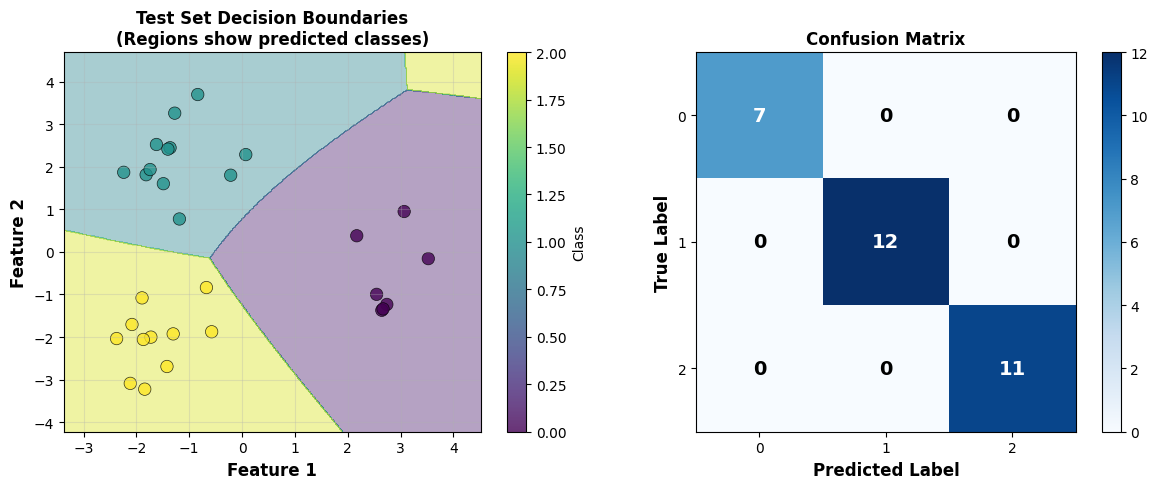

Note: Colored regions show predicted classes, points show actual samples


In [13]:
# Visualize decision boundaries
def plot_decision_boundaries(X, y, model, title="Decision Boundaries"):
    """
    Plot decision boundaries for 2D classification.
    """
    h = 0.02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict on mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(12, 5))
    
    # Decision boundaries
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis',
                         s=80, edgecolors='black', linewidths=0.5, alpha=0.8)
    plt.colorbar(scatter, label='Class')
    plt.xlabel('Feature 1', fontsize=12, fontweight='bold')
    plt.ylabel('Feature 2', fontsize=12, fontweight='bold')
    plt.title(f'{title}\n(Regions show predicted classes)', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Confusion matrix
    plt.subplot(1, 2, 2)
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix', fontsize=12, fontweight='bold')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y)))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black",
                fontsize=14, fontweight='bold')
    
    plt.ylabel('True Label', fontsize=12, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Plot for test set
plot_decision_boundaries(X_test, y_test, model, "Test Set Decision Boundaries")

print("Note: Colored regions show predicted classes, points show actual samples")

## Example : Understanding Gnostic Weights

This example shows how the model automatically assigns weights to samples based on their reliability.
This example demonstrates how to access and visualize the model's training history to understand the learning process in detail.

In [14]:
# Access gnostic weights
weights = model.weights

print("Gnostic Weights Summary:")
print("-" * 50)
print(f"Total samples: {len(weights)}")
print(f"Mean weight:   {np.mean(weights):.4f}")
print(f"Min weight:    {np.min(weights):.4f}")
print(f"Max weight:    {np.max(weights):.4f}")
print(f"Std weight:    {np.std(weights):.4f}")

# Identify samples with low weights (potential outliers or ambiguous points)
low_weight_threshold = np.mean(weights) - np.std(weights)
low_weight_indices = np.where(weights < low_weight_threshold)[0]

print(f"\nSamples with low weights ({len(low_weight_indices)} total):")
for idx in low_weight_indices[:10]:  # Show first 10
    print(f"  Sample {idx}: weight = {weights[idx]:.4f}, true class = {y[idx]}, predicted = {y_pred[idx]}")
    
print("\nNote: Low-weight samples are often near decision boundary or mislabeled")

Gnostic Weights Summary:
--------------------------------------------------
Total samples: 69
Mean weight:   1.0000
Min weight:    1.0000
Max weight:    1.0000
Std weight:    0.0000

Samples with low weights (0 total):

Note: Low-weight samples are often near decision boundary or mislabeled


## Model History

In [17]:
model._history[-1]

{'iteration': 100,
 'cross_entropy_loss': np.float64(0.031251360257029695),
 'coefficients': array([[ 0.86151073, -0.17819804, -0.6833127 ],
        [ 1.39293324, -0.61322198, -0.77971126],
        [-0.1037674 ,  1.04728838, -0.94352098],
        [-0.02253949, -0.06864298,  0.09118247],
        [-0.15648466, -0.17659078,  0.33307544],
        [-0.18876193,  0.06102076,  0.12774117]]),
 'rentropy': np.float64(0.9265494463042725),
 'weights': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.])}

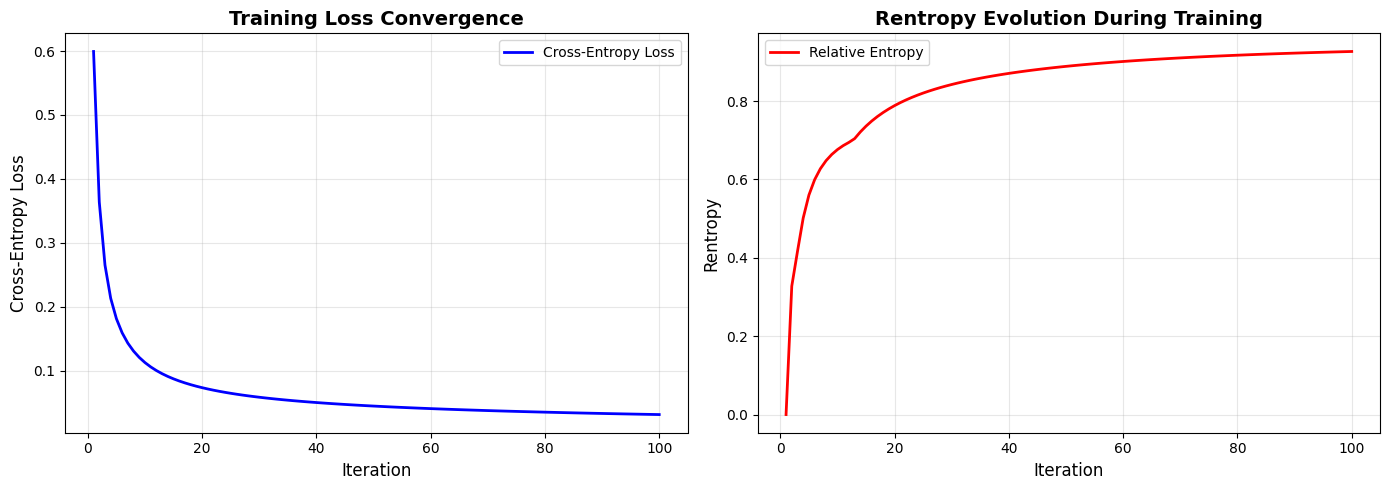


Training Summary:
  Initial Loss: 0.5993
  Final Loss: 0.0313
  Loss Reduction: 0.5681
  Final Rentropy: 0.9265
  Total Iterations: 100


In [16]:
# Extract history from the model
hist = model._history

# Extract metrics from history (skip iteration 0 which has None values)
iterations = np.array([rec['iteration'] for rec in hist[1:]])
log_loss = np.array([rec['cross_entropy_loss'] for rec in hist[1:]])
rentropy = np.array([rec['rentropy'] for rec in hist[1:]])

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Loss Convergence
axes[0].plot(iterations, log_loss, 'b-', linewidth=2, label='Cross-Entropy Loss')
axes[0].set_xlabel('Iteration', fontsize=12)
axes[0].set_ylabel('Cross-Entropy Loss', fontsize=12)
axes[0].set_title('Training Loss Convergence', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Plot 2: Rentropy Evolution
axes[1].plot(iterations, rentropy, 'r-', linewidth=2, label='Relative Entropy')
axes[1].set_xlabel('Iteration', fontsize=12)
axes[1].set_ylabel('Rentropy', fontsize=12)
axes[1].set_title('Rentropy Evolution During Training', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\nTraining Summary:")
print(f"  Initial Loss: {log_loss[0]:.4f}")
print(f"  Final Loss: {log_loss[-1]:.4f}")
print(f"  Loss Reduction: {log_loss[0] - log_loss[-1]:.4f}")
print(f"  Final Rentropy: {rentropy[-1]:.4f}")
print(f"  Total Iterations: {len(iterations)}")